In [46]:
#Import of MobileNet repositories
from keras.applications import MobileNet

mobilenet=MobileNet(weights='imagenet') 

In [47]:
#Import Libraries
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
#Definition of the additional layers
from keras.layers import Dense,GlobalAveragePooling2D

base_model=MobileNet(weights='imagenet', include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(6,activation='softmax')(x)

/home/mcslk/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:206: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [49]:
#Definition of the Model
from keras.models import Model

model=Model(inputs=base_model.input,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [50]:
#Determining the layers for additional training
for layer in model.layers[:-5]:
    layer.trainable=False

In [51]:
#Importing of training photos of the data set
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory(
    './Guitars/',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 981 images belonging to 6 classes.


In [52]:
#Model Compilation
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [53]:
#Model Training
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=train_generator.n/train_generator.batch_size,
    epochs=10
)

Epoch 1/10


/home/mcslk/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


31/30 [==============================] - 89s 3s/step - loss: 1.4088 - acc: 0.4544
Epoch 2/10
31/30 [==============================] - 87s 3s/step - loss: 0.8133 - acc: 0.6939
Epoch 3/10
31/30 [==============================] - 87s 3s/step - loss: 0.5874 - acc: 0.7781
Epoch 4/10
31/30 [==============================] - 87s 3s/step - loss: 0.3455 - acc: 0.8739
Epoch 5/10
31/30 [==============================] - 83s 3s/step - loss: 0.3559 - acc: 0.8638
Epoch 6/10
31/30 [==============================] - 82s 3s/step - loss: 0.1679 - acc: 0.9420
Epoch 7/10
31/30 [==============================] - 87s 3s/step - loss: 0.3144 - acc: 0.8865
Epoch 8/10
31/30 [==============================] - 86s 3s/step - loss: 0.1689 - acc: 0.9375
Epoch 9/10
31/30 [==============================] - 88s 3s/step - loss: 0.2014 - acc: 0.9284
Epoch 10/10
31/30 [==============================] - 86s 3s/step - loss: 0.0679 - acc: 0.9808


In [54]:
#Definition of the outputs
print(train_generator.class_indices)

{'Hollow Body': 0, 'Les Paul': 1, 'SG': 2, 'Semi Hollow': 3, 'Stratocaster': 4, 'Telecaster': 5}


In [94]:
#Image Import
from tkinter import Tk
from tkinter.filedialog import askopenfilename

Tk().withdraw()
filename = askopenfilename()

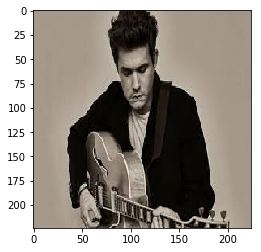

3

In [95]:
#Test Prediction
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()
 
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = preprocess_input(image_batch.copy())
predictions = model.predict(processed_image)

result = np.argmax(predictions)

result

In [96]:
#Redirecting to the shop categories
import webbrowser
if result == 0:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/hollow-semi-hollow-body-guitars?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
elif result == 1:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/les-paul?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
elif result == 2:
    webbrowser.open('https://www.andertons.co.uk/sg-guitars?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')   
elif result == 3:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/hollow-semi-hollow-body-guitars?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
elif result == 4:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/stratocaster?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
else:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/telecaster?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')